In [18]:
import numpy as np
import os.path
import time
import sys
import time
import pyprind
# from align import AlignDlib
# import dlib
import cv2

import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import bz2
import os
from PIL import Image

from urllib.request import urlopen

class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        list_files = os.listdir(os.path.join(path, i))
        if len(list_files) > 10:
            for f in list_files:
                # Check file extension. Allow only jpg/jpeg' files.
                ext = os.path.splitext(f)[1]
                if ext == '.jpg' or ext == '.jpeg':
                    metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

def load_image(path):
    img = cv2.imread(path, 1)
    return img[...,::-1]

In [20]:
from keras.models import load_model
import cv2
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import time
import pickle

%matplotlib inline

In [24]:
model = load_model('data/food_ai_model.hdf5', compile=False)
label_encoder = pickle.load(open('label/label_encode','rb'))
metadata = load_metadata('food/images')

def recognize(img):
    start_time = time.time()
    x = (img/225.)
    prediction = model.predict(np.expand_dims(x, axis=0))[0]
    label = label_encoder.inverse_transform([np.argmax(prediction)])[0]
    
    return label,prediction[np.argmax(prediction)]

In [39]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

Image label : cup_cakes


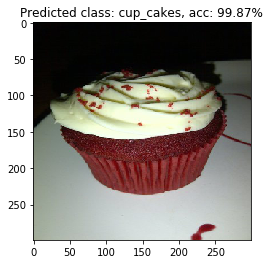

In [41]:
from random import randint

idx = randint(0,len(metadata))
img_class = metadata[idx].name
img_path = metadata[idx].image_path()

img =  load_img(img_path,target_size=(299,299))
x = img_to_array(img)
prediction = model.predict(np.expand_dims(x, axis=0))[0]
pred_class = label_encoder[np.argmax(prediction)]
acc = "%.2f" % (prediction[np.argmax(prediction)] * 100)

print(f'Image label : {img_class}')

plt.title(f'Predicted class: {pred_class}, acc: {acc}%')
plt.imshow(img)